Trying to reach dataset 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] =  '/content/gdrive/MyDrive/kaggle_dataset'

In [ ]:
%cd /content/gdrive/MyDrive/kaggle_dataset

/content/gdrive/MyDrive/kaggle_dataset


In [ ]:
!ls

kaggle.json  sample_submission.csv.zip	santander-product-recommendation


In [ ]:
!kaggle competitions download -c santander-product-recommendation

 97% 207M/214M [00:02<00:00, 98.0MB/s]
100% 214M/214M [00:02<00:00, 98.8MB/s]
 40% 5.00M/12.4M [00:00<00:00, 38.3MB/s]
100% 12.4M/12.4M [00:00<00:00, 60.7MB/s]
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir santander-product-recommendation
!mv test_ver2.csv.zip santander-product-recommendation
!mv train_ver2.csv.zip santander-product-recommendation

mkdir: cannot create directory ‘santander-product-recommendation’: File exists
mv: cannot stat 'test_ver2.csv.zip': No such file or directory
mv: cannot stat 'train_ver2.csv.zip': No such file or directory


In [ ]:
%cd santander-product-recommendation

/content/gdrive/My Drive/kaggle_dataset/santander-product-recommendation


In [ ]:
!unzip test_ver2.csv.zip

Archive:  test_ver2.csv.zip
replace test_ver2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip train_ver2.csv.zip

Archive:  train_ver2.csv.zip
  inflating: train_ver2.csv          


Importing test, train dataset

In [2]:
import pandas as pd 
test = pd.read_csv('/content/gdrive/MyDrive/kaggle_dataset/santander-product-recommendation/test_ver2.csv')
test.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,NaN,1.0,A,S,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,NaN,1.0,A,S,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             929615 non-null  object 
 1   ncodpers               929615 non-null  int64  
 2   ind_empleado           929615 non-null  object 
 3   pais_residencia        929615 non-null  object 
 4   sexo                   929610 non-null  object 
 5   age                    929615 non-null  int64  
 6   fecha_alta             929615 non-null  object 
 7   ind_nuevo              929615 non-null  int64  
 8   antiguedad             929615 non-null  int64  
 9   indrel                 929615 non-null  int64  
 10  ult_fec_cli_1t         1683 non-null    object 
 11  indrel_1mes            929592 non-null  float64
 12  tiprel_1mes            929592 non-null  object 
 13  indresi                929615 non-null  object 
 14  indext                 929615 non-nu

In [3]:
import pandas as pd
train = pd.read_csv('/content/gdrive/MyDrive/kaggle_dataset/santander-product-recommendation/train_ver2.csv',parse_dates=['fecha_dato'], nrows=7000000)
train.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,10,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


First look on datasets (size, types, etc.)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

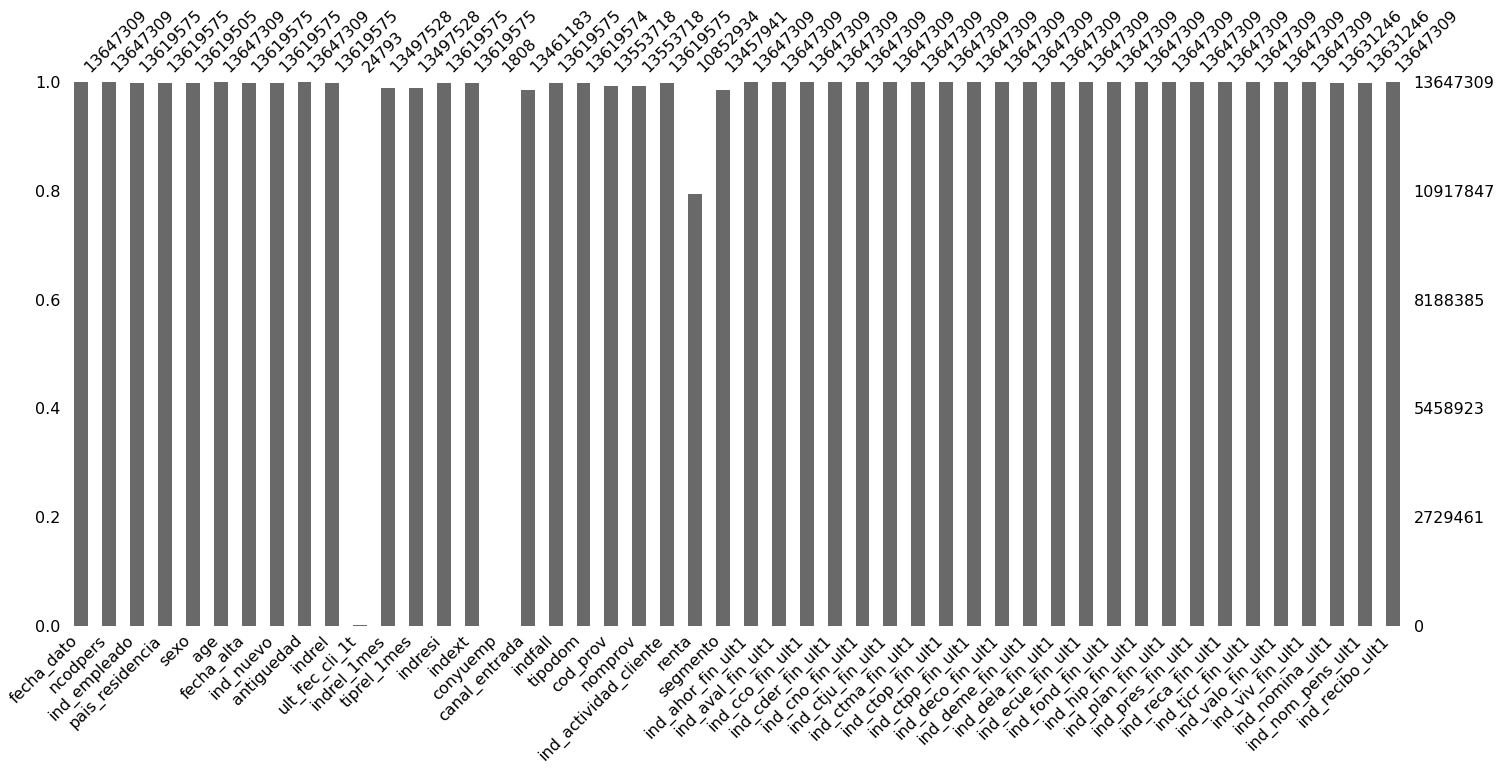

In [ ]:
msno.bar(train);

Looking at what percentage of the entire dataset is where the null values ​​are

In [6]:
train.isnull().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

Columns are "ult_fec_cli_1t", "conyuemp" that are null percentage %99 in all train dataset. May drop these columns.                            

In [7]:
train.isna().sum()/train.shape[0]*100

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              0.203220
pais_residencia           0.203220
sexo                      0.203732
age                       0.000000
fecha_alta                0.203220
ind_nuevo                 0.203220
antiguedad                0.000000
indrel                    0.203220
ult_fec_cli_1t           99.818330
indrel_1mes               1.097513
tiprel_1mes               1.097513
indresi                   0.203220
indext                    0.203220
conyuemp                 99.986752
canal_entrada             1.363829
indfall                   0.203220
tipodom                   0.203227
cod_prov                  0.685784
nomprov                   0.685784
ind_actividad_cliente     0.203220
renta                    20.475648
segmento                  1.387585
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

In [11]:
train.columns

Index(['Date', 'Customer Code', 'Employee Index', 'Customer Country Residence',
       'Sex', 'Age', 'Discharge Date', 'New Cust Index', 'Customer Senority',
       'Indrel', 'LastDateAsPrimaryCust', 'Customer Type',
       'Customer Relation Type', 'Residence Index', 'Foreigner Index',
       'Spouse Index', 'Input Channel', 'Deceased Index', 'Adress Type',
       'Province Code', 'Province Name', 'Activity Index',
       'GrossIncomeHousehold', 'Segmentation', 'Saving Account', 'Guarantees',
       'CurrentAccount', 'DerivadaAccount', 'PayrollAccount', 'JuniorAccount',
       'MoreSpecialAccount', 'ParticularAccount', 'ParticularPlusAccount',
       'ShortTermDeposits', 'MediumTermDeposits', 'LongTermDeposits',
       'E-Account', 'Funds', 'Mortgage', 'Pensions', 'Loans', 'Taxes',
       'CreditCard', 'Securities', 'HomeAccount', 'Payroll', 'Pensions',
       'DirectDebit'],
      dtype='object')

Change column names

In [12]:
new_columns = ['Date','Customer Code','Employee Index','Customer Country Residence','Sex','Age', 'Discharge Date', 'New Cust Index', 'Customer Senority','Indrel','LastDateAsPrimaryCust','Customer Type', 'Customer Relation Type', 'Residence Index', 'Foreigner Index','Spouse Index','Input Channel','Deceased Index', 'Adress Type', 'Province Code', 'Province Name', 'Activity Index', 'GrossIncomeHousehold','Segmentation','Saving Account', 'Guarantees', 'CurrentAccount','DerivadaAccount','PayrollAccount','JuniorAccount','MoreSpecialAccount', 'ParticularAccount','ParticularPlusAccount','ShortTermDeposits','MediumTermDeposits','LongTermDeposits','E-Account','Funds','Mortgage','Pensions','Loans','Taxes','CreditCard','Securities','HomeAccount','Payroll','Pensions','DirectDebit' ]
train.columns = new_columns

In [6]:
train.head()

,Date,Customer Code,Employee Index,Customer Country Residence,Sex,Age,Discharge Date,New Cust Index,Customer Senority,Indrel,LastDateAsPrimaryCust,Customer Type,Customer Relation Type,Residence Index,Foreigner Index,Spouse Index,Input Channel,Deceased Index,Adress Type,Province Code,Province Name,Activity Index,GrossIncomeHousehold,Segmentation,Saving Account,Guarantees,CurrentAccount,DerivadaAccount,PayrollAccount,JuniorAccount,MoreSpecialAccount,ParticularAccount,ParticularPlusAccount,ShortTermDeposits,MediumTermDeposits,LongTermDeposits,E-Account,Funds,Mortgage,Pensions,Loans,Taxes,CreditCard,Securities,HomeAccount,Payroll,Pensions,DirectDebit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [7]:
train.isna().sum()/train.shape[0]*100

Date                           0.000000
Customer Code                  0.000000
Employee Index                 0.396200
Customer Country Residence     0.396200
Sex                            0.396686
Age                            0.000000
Discharge Date                 0.396200
New Cust Index                 0.396200
Customer Senority              0.000000
Indrel                         0.396200
LastDateAsPrimaryCust         99.843557
Customer Type                  1.497200
Customer Relation Type         1.497200
Residence Index                0.396200
Foreigner Index                0.396200
Spouse Index                  99.985743
Input Channel                  1.703600
Deceased Index                 0.396200
Adress Type                    0.396200
Province Code                  0.915571
Province Name                  0.915571
Activity Index                 0.396200
GrossIncomeHousehold          17.889371
Segmentation                   1.718914
Saving Account                 0.000000


In [13]:
train.drop(labels=['LastDateAsPrimaryCust', 'Spouse Index'],axis = 1, inplace= True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 46 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Date                        datetime64[ns]
 1   Customer Code               int64         
 2   Employee Index              object        
 3   Customer Country Residence  object        
 4   Sex                         object        
 5   Age                         object        
 6   Discharge Date              object        
 7   New Cust Index              float64       
 8   Customer Senority           object        
 9   Indrel                      float64       
 10  Customer Type               object        
 11  Customer Relation Type      object        
 12  Residence Index             object        
 13  Foreigner Index             object        
 14  Input Channel               object        
 15  Deceased Index              object        
 16  Adress Type       

In [15]:
train1 = train.set_index('Customer Code')

In [16]:
train1.head()

,Date,Employee Index,Customer Country Residence,Sex,Age,Discharge Date,New Cust Index,Customer Senority,Indrel,Customer Type,Customer Relation Type,Residence Index,Foreigner Index,Input Channel,Deceased Index,Adress Type,Province Code,Province Name,Activity Index,GrossIncomeHousehold,Segmentation,Saving Account,Guarantees,CurrentAccount,DerivadaAccount,PayrollAccount,JuniorAccount,MoreSpecialAccount,ParticularAccount,ParticularPlusAccount,ShortTermDeposits,MediumTermDeposits,LongTermDeposits,E-Account,Funds,Mortgage,Pensions,Loans,Taxes,CreditCard,Securities,HomeAccount,Payroll,Pensions,DirectDebit
Customer Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1375586,2015-01-28,N,ES,H,35,2015-01-12,0.0,6,1.0,1,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1050611,2015-01-28,N,ES,V,23,2012-08-10,0.0,35,1.0,1,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1050612,2015-01-28,N,ES,V,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1050613,2015-01-28,N,ES,H,22,2012-08-10,0.0,35,1.0,1,I,S,N,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1050614,2015-01-28,N,ES,V,23,2012-08-10,0.0,35,1.0,1,A,S,N,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
pip install pandas-profiling==2.11.0 

     |████████████████████████████████| 245kB 10.7MB/s 
     |████████████████████████████████| 1.1MB 20.7MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 3.2MB 38.3MB/s 
     |████████████████████████████████| 296kB 36.6MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=ecea006372bb65ca1a18558716867c698f1859fef3c0b47e8a156c4c16fdfd6f
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=267c48c88a2e5979e8419a152658bf4b366b2d6d355ee5fe64b1b3ec5f896628
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but 

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport
ProfileReport(train)

Summarize dataset:   0%|          | 0/61 [00:00<?, ?it/s]